In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', name='layer_1'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones', name='layer_2'),
    layers.Dense(4, activation='softmax', name='layer_3'),
])

In [8]:
# Display the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 4)                 20        
                                                                 
 layer_2 (Dense)             (None, 2)                 10        
                                                                 
 layer_3 (Dense)             (None, 4)                 12        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [25]:
# Retrieve the weights and biases

def get_model_weights(model):
    return [ e.weights[0].numpy() for e in model.layers ]

def get_model_bias(model):
    return [ e.bias.numpy() for e in model.layers ]

def plot_variation(W0_layers, b0_layers, W1_layers, b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

In [20]:
W0_layers = get_model_weights(model)
B0_layers = get_model_bias(model)

In [21]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [22]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [23]:
# Retrieve weights and biases

W1_layers = get_model_weights(model)
B1_layers = get_model_bias(model)

Layer 0: bias variation:  0.21255484
Layer 1: bias variation:  0.10551163
Layer 2: bias variation:  0.14920187


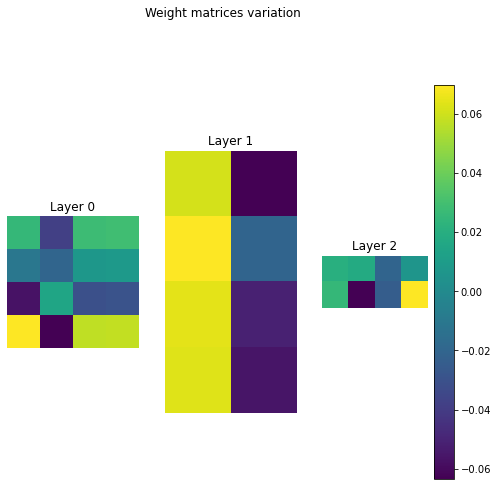

In [27]:
# Plot the variation

plot_variation(W0_layers, B0_layers, W1_layers, B1_layers)

#### Freeze layers at build time

In [36]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [37]:
# Build the model
# Add trainable = False

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones', name='layer_1', trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones', name='layer_2'),
    layers.Dense(4, activation='softmax', name='layer_3'),
])

In [38]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [39]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [40]:
# Retrieve weights and biases

W0_layers = get_model_weights(model)
B0_layers = get_model_bias(model)

In [41]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [42]:
# Retrieve weights and biases

W1_layers = get_model_weights(model)
B1_layers = get_model_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.17522892
Layer 2: bias variation:  0.2725268


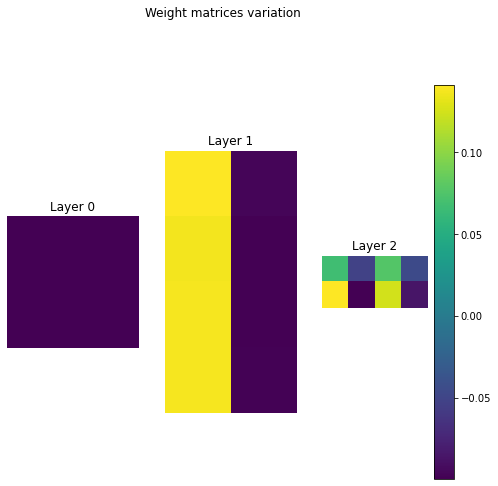

In [43]:
# Plot the variation

plot_variation(W0_layers, B0_layers, W1_layers, B1_layers)

#### Freeze layers of a pre-built model

In [46]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [52]:
# Freeze the second layer

model.get_layer('layer_2').trainable = False

In [53]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [54]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [55]:
# Retrieve weights and biases

W2_layers = get_model_weights(model)
B2_layers = get_model_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.13310733


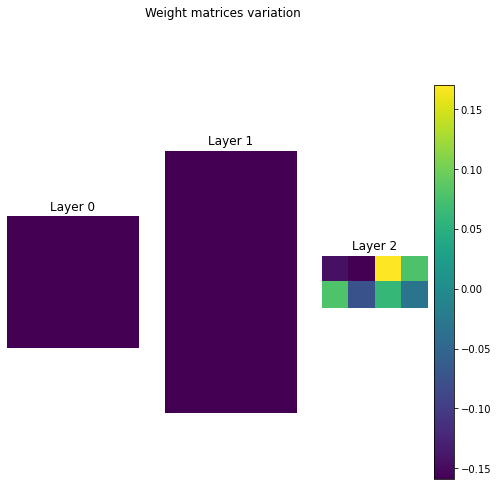

In [56]:
# Plot the variation

plot_variation(W1_layers, B1_layers, W2_layers, B2_layers)